mage      0
meduc     3
monpre    0
npvis     3
fage      0
feduc     7
omaps     0
fmaps     0
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64
mage      0
meduc     0
monpre    0
npvis     0
fage      0
feduc     0
omaps     0
fmaps     0
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64
The following plots are related to age features 

-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-


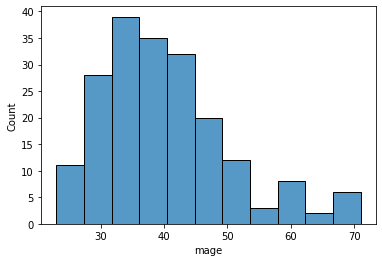

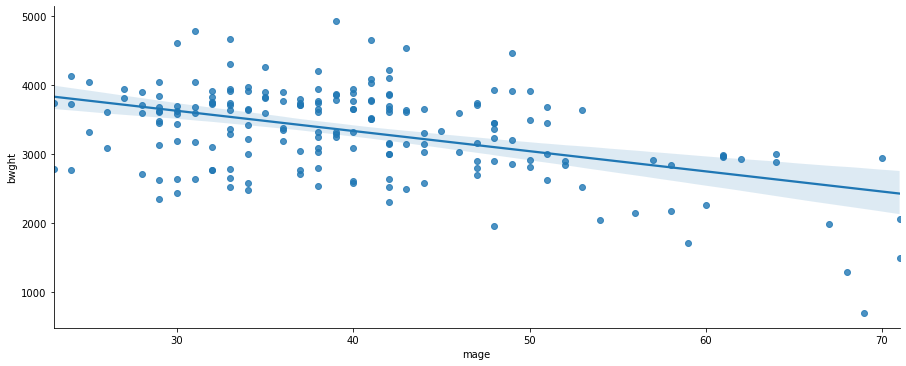

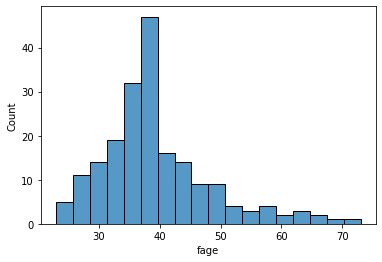

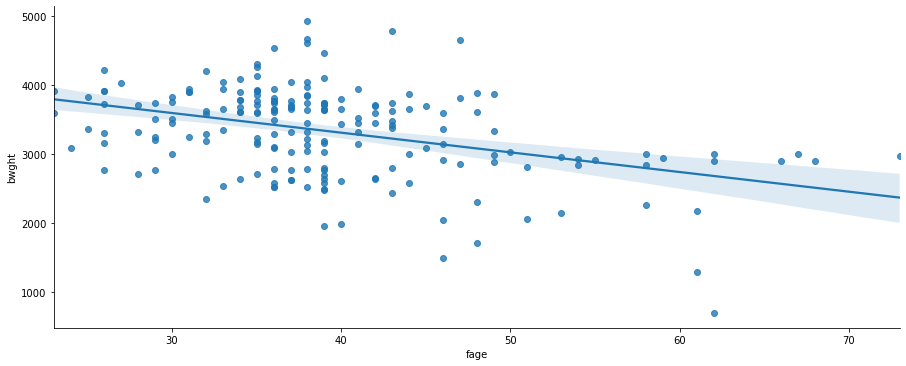

 The following link talks about how the relationship between mother and father age affect the birth weight 

https://med.stanford.edu/news/all-news/2018/10/older-fathers-associated-with-increased-birth-risks.html


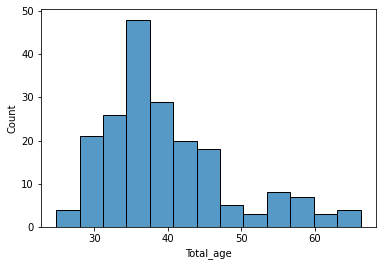

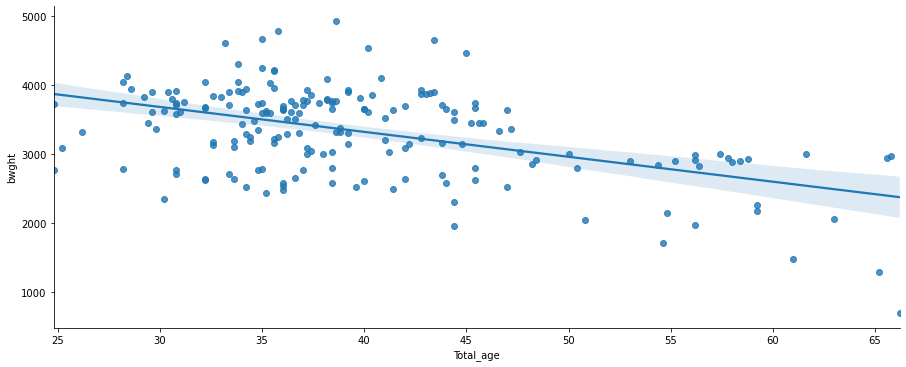

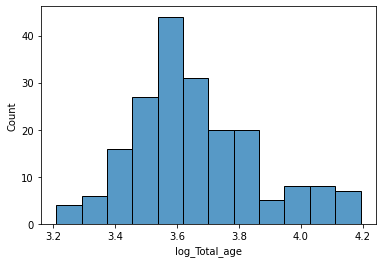

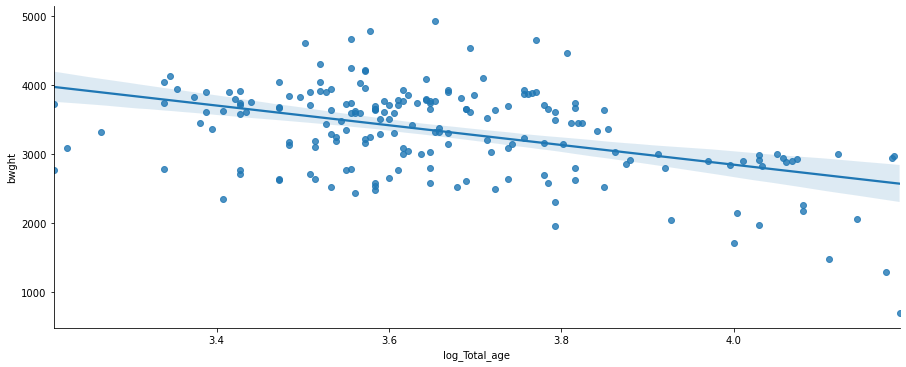

The following plots are related to education features 

-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-


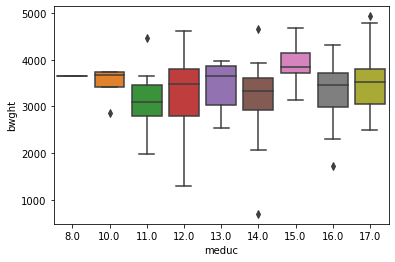

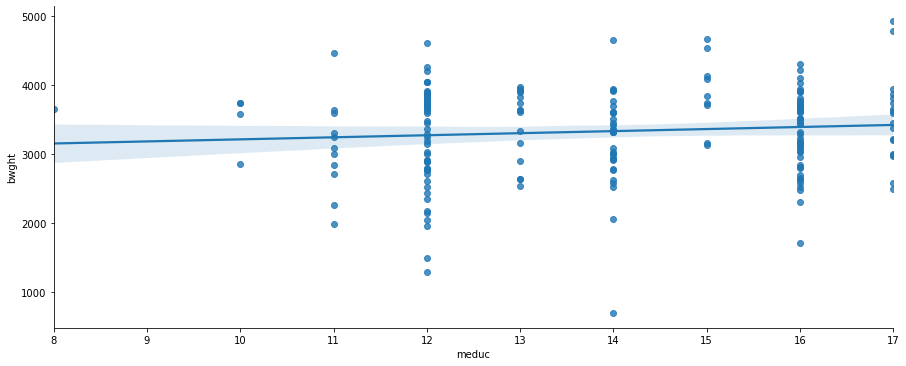

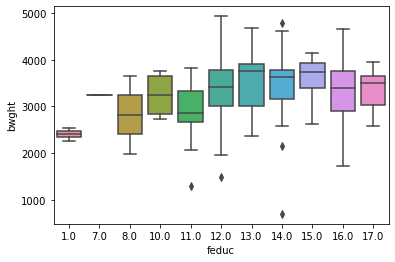

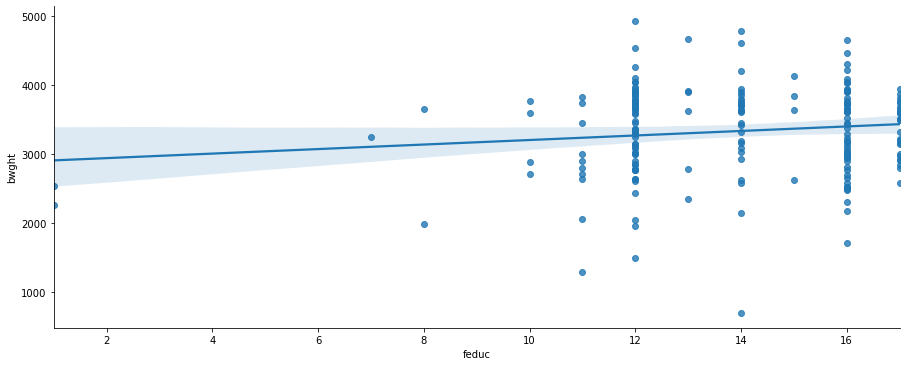

The following plots are related to cigarrates and drinks features 

-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-


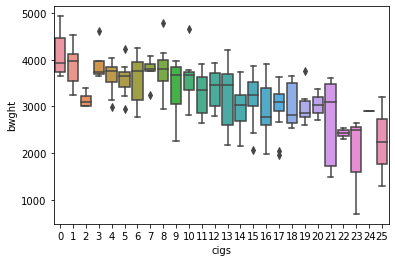

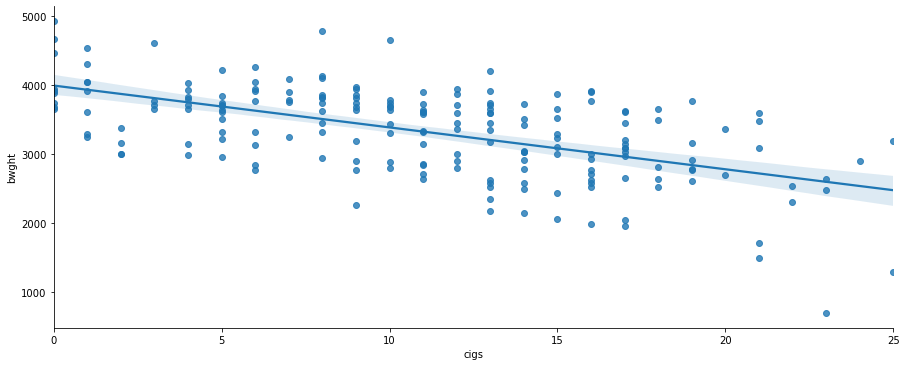

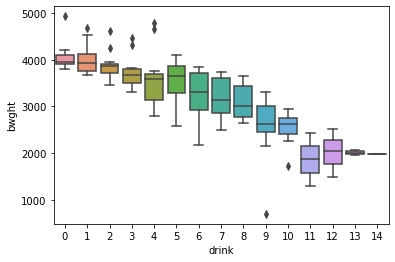

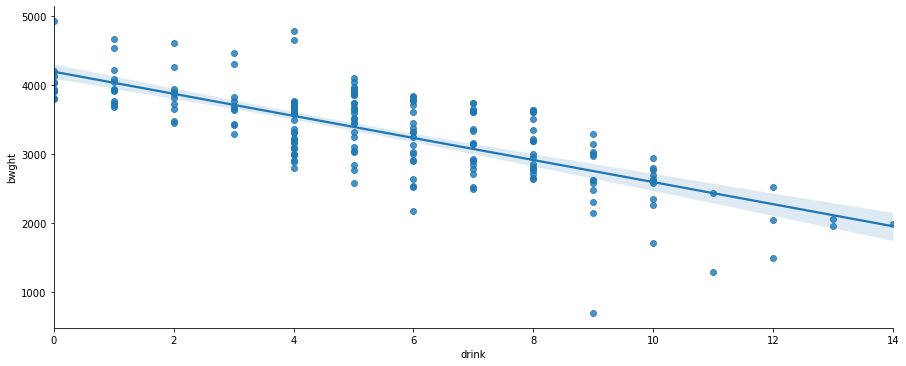

The following plots are related to number of visits to the doctor features 

-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-


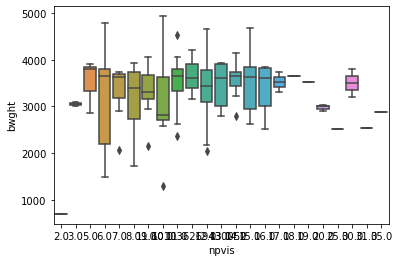

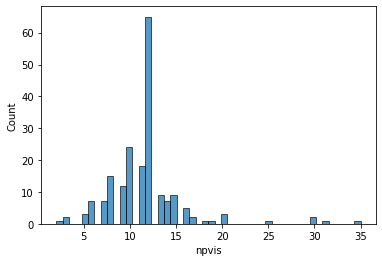

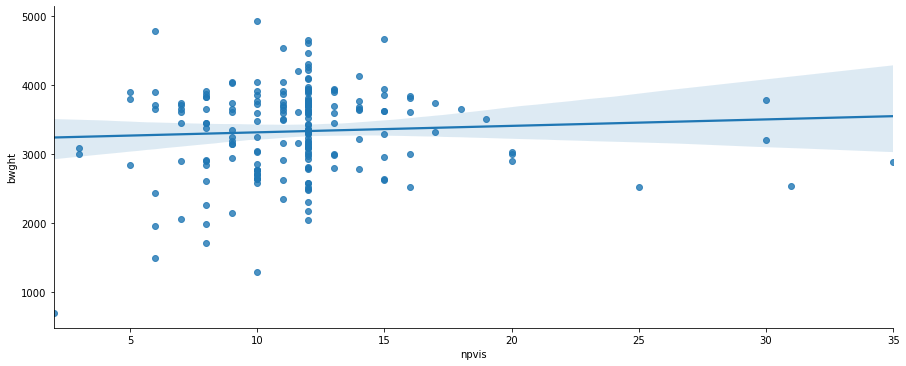

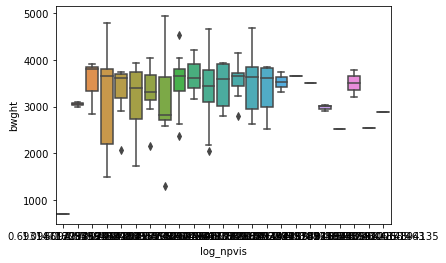

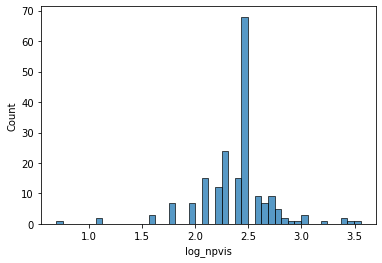

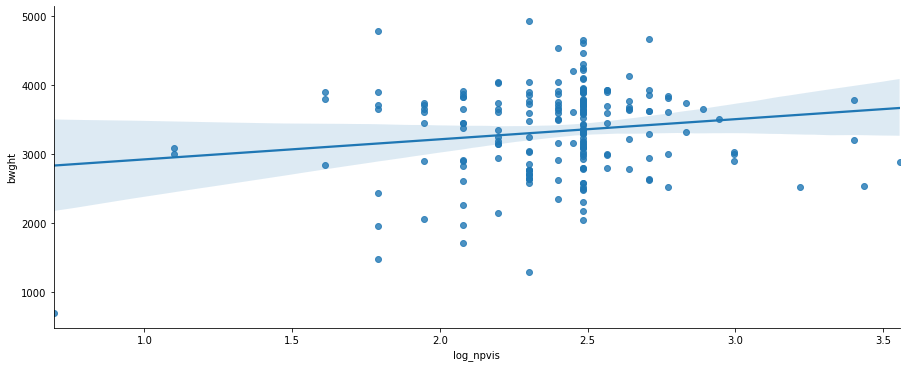

mage            -0.46
fage            -0.40
meduc            0.09
feduc            0.13
log_Total_age   -0.45
log_npvis        0.16
monpre          -0.05
npvis            0.06
cigs            -0.57
drink           -0.74
bwght            1.00
Name: bwght, dtype: float64
The following information will show both models (train and test) 

-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.- 

In this case I use the OLS Regression (standard linear regression)
Test score for OSL 0.5589294288895281
Train score for OSL 0.7723588122290009
The difference is:  0.2134293833394728
TRAIN MODEL
                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     117.8
Date:                Thu, 09 Dec 2021   Pr

In [2]:
# importing libraries
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns # enhanced graphical output
import sklearn
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf # predictive modeling with nice outputs


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# specifying file name
file = './__datasets/birthweight_low.xlsx'

birthweight = pd.read_excel(io= file)

##As commented in class, I will ignore the features of omaps and fmaps
##Due to is data after the baby's birth

#The following features are consider as contonuous variables
continuous_data = ['mage', 'fage']
#The following features are consider as interval variables
interval_data = ['meduc', 'monpre','feduc', 'cigs', 'drink','npvis']
#The following features are consider as categorical variables
dummies_data =['male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck', 'foth']

##Find out it there is any missing values in any feature
print(birthweight.isnull().sum(axis=0))

#Replace the missing values with the respective information
birthweight['meduc'] = birthweight['meduc'].fillna(value = birthweight['meduc'].median())
birthweight['npvis'] = birthweight['npvis'].fillna(value = birthweight['npvis'].mean())
birthweight['feduc'] = birthweight['feduc'].fillna(value = birthweight['feduc'].median())

##Find out it there is any missing values in any feature after replacing the missing values
print(birthweight.isnull().sum(axis=0))

#The following plots are related to mage feature to understand it
#Hist plot of mage variable
print("""The following plots are related to age features \n
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-""")

sns.histplot(x='mage', data = birthweight)
plt.show()

#Scatter plot of mage variable
sns.lmplot(x  = 'mage',  # x-axis feature
           y          = 'bwght',  # y-axis feature
           hue        = None,     # categorical data for subsets
           legend_out = False,    # formats legend if hue != None
           scatter    = True,     # renders a scatter plot
           fit_reg    = True,     # renders a regression line
           aspect     = 2.5,        # aspect ratio for plot
           data       = birthweight) # DataFrame where features exist
plt.show()

#The following plots are related to fage feature to understand it
#Hist plot of fage variable
sns.histplot(x='fage', data = birthweight)
plt.show()
#Scatter plot of fage variable
sns.lmplot(x  = 'fage',  # x-axis feature
           y          = 'bwght',  # y-axis feature
           hue        = None,     # categorical data for subsets
           legend_out = False,    # formats legend if hue != None
           scatter    = True,     # renders a scatter plot
           fit_reg    = True,     # renders a regression line
           aspect     = 2.5,        # aspect ratio for plot
           data       = birthweight) # DataFrame where features exist
plt.show()

#I'm going to check if the total parent's age affect the model
print(""" The following link talks about how the relationship between mother and father age affect the birth weight \n
https://med.stanford.edu/news/all-news/2018/10/older-fathers-associated-with-increased-birth-risks.html""")
#I choose the percentages of the parents impact arbitrary 
birthweight['Total_age'] = birthweight['mage']*0.6+ birthweight['fage']*0.4

# developing a histogram of total age
sns.histplot(x= 'Total_age', data=birthweight)
plt.show()
# developing a scatter plot of total age
sns.lmplot(x  = 'Total_age',  # x-axis feature
           y          = 'bwght',  # y-axis feature
           hue        = None,     # categorical data for subsets
           legend_out = False,    # formats legend if hue != None
           scatter    = True,     # renders a scatter plot
           fit_reg    = True,     # renders a regression line
           aspect     = 2.5,        # aspect ratio for plot
           data       = birthweight) # DataFrame where features exist
plt.show()


#Tranform the Total age feature into logaritmic
birthweight['log_Total_age'] = np.log(birthweight['Total_age'])

# developing a histogram of total age
sns.histplot(x= 'log_Total_age', data=birthweight)
plt.show()
# developing a histogram of total log total age
sns.lmplot(x  = 'log_Total_age',  # x-axis feature
           y          = 'bwght',  # y-axis feature
           hue        = None,     # categorical data for subsets
           legend_out = False,    # formats legend if hue != None
           scatter    = True,     # renders a scatter plot
           fit_reg    = True,     # renders a regression line
           aspect     = 2.5,        # aspect ratio for plot
           data       = birthweight) # DataFrame where features exist
plt.show()
# This plot show a more normal distribution. I will use it into the final model.


#The following plots are related to educ feature to understand it
#Hist plot of mage variable
print("""The following plots are related to education features \n
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-""")

#Boxplot for meduc
sns.boxplot(x  = 'meduc',  # x-axis feature
           y   = 'bwght',  # y-axis feature
           data= birthweight) # DataFrame where features exist
plt.show()

#Scatterplot with trend line for meduc
sns.lmplot(x  = 'meduc',  # x-axis feature
           y          = 'bwght',  # y-axis feature
           hue        = None,     # categorical data for subsets
           legend_out = False,    # formats legend if hue != None
           scatter    = True,     # renders a scatter plot
           fit_reg    = True,     # renders a regression line
           aspect     = 2.5,        # aspect ratio for plot
           data       = birthweight) # DataFrame where features exist
plt.show()

#Boxplot for feduc
sns.boxplot(x  = 'feduc',  # x-axis feature
           y   = 'bwght',  # y-axis feature
           data= birthweight) # DataFrame where features exist
plt.show()

#Scatterplot with trend line for feduc
sns.lmplot(x  = 'feduc',  # x-axis feature
           y          = 'bwght',  # y-axis feature
           hue        = None,     # categorical data for subsets
           legend_out = False,    # formats legend if hue != None
           scatter    = True,     # renders a scatter plot
           fit_reg    = True,     # renders a regression line
           aspect     = 2.5,        # aspect ratio for plot
           data       = birthweight) # DataFrame where features exist
plt.show()

#The following plots are related to cigs and alcoholic drinks feature to understand it
#Hist plot of mage variable
print("""The following plots are related to cigarrates and drinks features \n
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-""")


#Boxplot for cigs
sns.boxplot(x  = 'cigs',  # x-axis feature
           y   = 'bwght',  # y-axis feature
           data= birthweight) # DataFrame where features exist
plt.show()


#Scatterplot with trend line for cigs
sns.lmplot(x  = 'cigs',  # x-axis feature
           y          = 'bwght',  # y-axis feature
           hue        = None,     # categorical data for subsets
           legend_out = False,    # formats legend if hue != None
           scatter    = True,     # renders a scatter plot
           fit_reg    = True,     # renders a regression line
           aspect     = 2.5,        # aspect ratio for plot
           data       = birthweight) # DataFrame where features exist
plt.show()

#Boxplot for drinks
sns.boxplot(x  = 'drink',  # x-axis feature
           y   = 'bwght',  # y-axis feature
           data= birthweight) # DataFrame where features exist
plt.show()

#Scatterplot with trend line for drinks
sns.lmplot(x  = 'drink',  # x-axis feature
           y          = 'bwght',  # y-axis feature
           hue        = None,     # categorical data for subsets
           legend_out = False,    # formats legend if hue != None
           scatter    = True,     # renders a scatter plot
           fit_reg    = True,     # renders a regression line
           aspect     = 2.5,        # aspect ratio for plot
           data       = birthweight) # DataFrame where features exist
plt.show()

#The following plots are related to visits to the doctor feature to understand it
print("""The following plots are related to number of visits to the doctor features \n
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-""")


#I will use the log_npvis due it is closer to a normal distribution
birthweight['log_npvis'] = np.log(birthweight['npvis'])

#Boxplot for cigs
sns.boxplot(x  = 'npvis',  # x-axis feature
           y   = 'bwght',  # y-axis feature
           data= birthweight) # DataFrame where features exist
plt.show()

#Histogram plot for cigs
sns.histplot(x='npvis', data = birthweight)
plt.show()

#Scatterplot with trend line for cigs
sns.lmplot(x  = 'npvis',  # x-axis feature
           y          = 'bwght',  # y-axis feature
           hue        = None,     # categorical data for subsets
           legend_out = False,    # formats legend if hue != None
           scatter    = True,     # renders a scatter plot
           fit_reg    = True,     # renders a regression line
           aspect     = 2.5,        # aspect ratio for plot
           data       = birthweight) # DataFrame where features exist
plt.show()

#Boxplot for log_npvis
sns.boxplot(x  = 'log_npvis',  # x-axis feature
           y   = 'bwght',  # y-axis feature
           data= birthweight) # DataFrame where features exist
plt.show()

#Histogram plot for log_npvis
sns.histplot(x='log_npvis', data = birthweight)
plt.show()

#Scatterplot with trend line for log_npvis
sns.lmplot(x  = 'log_npvis',  # x-axis feature
           y          = 'bwght',  # y-axis feature
           hue        = None,     # categorical data for subsets
           legend_out = False,    # formats legend if hue != None
           scatter    = True,     # renders a scatter plot
           fit_reg    = True,     # renders a regression line
           aspect     = 2.5,        # aspect ratio for plot
           data       = birthweight) # DataFrame where features exist
plt.show()

#We can see that log_npvis is closer to a normal distribution

# developing a correlation matrix
new_corr = birthweight.loc[ : , ['mage','fage','meduc', 'feduc', 'log_Total_age', 'log_npvis',
                                 'monpre', 'npvis', 'cigs', 'drink',
                                 'bwght']  ].corr(method = 'pearson')\
                                              .round(decimals = 2)

print(new_corr['bwght'])

print("""The following information will show both models (train and test) \n
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.- \n
In this case I use the OLS Regression (standard linear regression)""")

#New variables to run the train and test model
X = birthweight.drop('bwght',axis=1)
y = birthweight['bwght']


#Split the data into train and test sub sets
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state = 219)
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
print('Test score for OSL',reg.score(X_test,y_test))
print('Train score for OSL',reg.score(X_train,y_train))
print('The difference is: ',reg.score(X_train,y_train)-reg.score(X_test,y_test))

#Create the train set and the test set
train_set=pd.concat([X_train,y_train],axis=1)
test_set=pd.concat([X_test,y_test],axis=1)

# Step 1: INSTANTIATE a model object
lm_best = smf.ols(formula = f"""bwght ~ cigs+drink+Total_age""", data = train_set)
    # Step 2: FIT the data into the model object
results = lm_best.fit()
    # Step 3: analyze the SUMMARY output
print("TRAIN MODEL")    
print(results.summary())

print("""This is to separate the train and test models \n
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-""")


# Step 1: INSTANTIATE a model object
lm_best = smf.ols(formula = f"""bwght ~ cigs+drink+Total_age""", data = test_set)
    # Step 2: FIT the data into the model object
results = lm_best.fit()
    # Step 3: analyze the SUMMARY output
print("TEST MODEL")    
print(results.summary())



X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state = 219)
reg1= Lasso(alpha = 0.5, normalize=True)
reg1.fit(X_train,y_train)
y_pred1=reg1.predict(X_test)
